# Movie recommendation system

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [298]:
df1 = pd.read_csv("Dataset/tmdb_5000_credits.csv")
df2 = pd.read_csv("Dataset/tmdb_5000_movies.csv")

In [299]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [300]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [301]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [302]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [303]:
## Renaming the columns of df1 from movie_id to id and merging with df2 with id as joint
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [304]:
df2.vote_average

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [305]:
df2.value_counts

<bound method DataFrame.value_counts of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.c

### weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
#### where: 
##### R = average for the movie (mean) = (Rating) 
#### v = number of votes for the movie = (votes)
#### m = minimum votes required to be listed in the Top 250 (currently 25000)
#### C: The mean vote across the entire report,


##### <b> NOTE: In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list. </b>

In [306]:
C = df2.vote_average.mean()
m = df2['vote_count'].quantile(0.9)

In [307]:
rated_movies = df2[df2['vote_count']>=m]
rated_movies.shape

(481, 23)

In [308]:
## creating a function to calculate the weighted average for all the movies
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [309]:
rated_movies['score'] = rated_movies.apply(weighted_rating,axis=1)

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_25193/362065147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_movies['score'] = rated_movies.apply(weighted_rating,axis=1)


In [310]:
rated_movies[['title','score','vote_count']].sort_values('score',ascending = False).head(5)

,title,score,vote_count
1881,The Shawshank Redemption,8.059258,8205
662,Fight Club,7.939256,9413
65,The Dark Knight,7.920020,12002
3232,Pulp Fiction,7.904645,8428
96,Inception,7.863239,13752


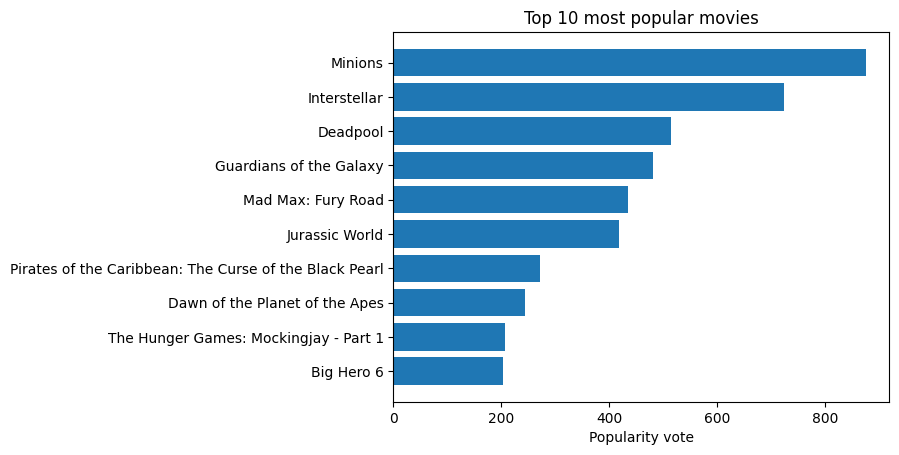

In [311]:
## plotting the movies based on its popularity

popularity = rated_movies[['title','popularity']].sort_values('popularity',ascending = False).head(10)
plt.barh(popularity['title'],popularity['popularity'])
plt.gca().invert_yaxis()
plt.xlabel('Popularity vote')
plt.title('Top 10 most popular movies')
plt.show()

In [312]:
## now we will compute the similarity between the movies based on the description 
## we will also calculate the similarity score between the movies
## here we will use the overview column

df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [313]:
## checking the number of null values in overview column

df2['overview'].isnull().sum()

3

In [314]:
## filling the null values with a blank space
df2['overview'] = df2['overview'].fillna('')
df2['overview'].isnull().sum()

0

In [315]:
## Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

##Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

## we can see below that there are 20978 differenc characters used in the description of the movie
tfidf_matrix.shape


(4803, 20978)

In [316]:
# Computing the cosine similarity matrix

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Assuming cosine_sim is your cosine similarity matrix
# Convert cosine_sim to a DataFrame for better formatting
cosine_sim_df = pd.DataFrame(cosine_sim, columns=range(len(cosine_sim)), index=range(len(cosine_sim)))

# Print the DataFrame
print(cosine_sim_df)


          0         1         2         3         4         5         6     \
0     1.000000  0.000000  0.000000  0.024995  0.000000  0.030353  0.000000   
1     0.000000  1.000000  0.000000  0.000000  0.033369  0.000000  0.000000   
2     0.000000  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
3     0.024995  0.000000  0.000000  1.000000  0.010433  0.005145  0.012601   
4     0.000000  0.033369  0.000000  0.010433  1.000000  0.000000  0.009339   
...        ...       ...       ...       ...       ...       ...       ...   
4798  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4799  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4800  0.000000  0.021605  0.014882  0.033864  0.006126  0.018289  0.000000   
4801  0.000000  0.000000  0.000000  0.042752  0.000000  0.005611  0.009274   
4802  0.000000  0.000000  0.000000  0.022692  0.000000  0.005690  0.005828   

          7         8         9     ...      4793      4794    

In [317]:
df2.index

RangeIndex(start=0, stop=4803, step=1)

In [318]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
print(indices)

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64


In [319]:
indices['Newlyweds']

4799

In [320]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [321]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

#### The above function only recommends movies similar to it. Which is not as much useful.
The quality of the recommendor can be made better with the help of other metadata
the 3 top actors, the director, related genres and the movie plot keywords

In [322]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [323]:

# extract the directors name
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
# Define the function
def update_top_3_names(df, column_names):
    for column_name in column_names:  # Iterate over each column name
        top_3_names = []
        for lst in df[column_name]:  # Iterate over each list in the column
            names = [dct['name'] for dct in lst[:3]]  # Extract names from the first three dictionaries
            top_3_names.append(names)
        df[column_name] = top_3_names  # Update the column with the top 3 names
    return df

# Define your DataFrame and column names
# Assuming df is your DataFrame and column_names is a list of column names
df2['director'] = df2['crew'].apply(get_director)

column_names = ['cast', 'keywords', 'genres']

# Call the function to update the DataFrame
df2 = update_top_3_names(df2, column_names)

In [289]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [332]:
# def clean_data(x):
#     if isinstance(x, list):
#         return [str.lower(i.replace(" ", "")) for i in x]
#     else:
#         #Check if director exists. If not, return empty string
#         if isinstance(x, str):
#             return str.lower(x.replace(" ", ""))
#         else:
#             return ''
# # features = ['cast', 'keywords', 'director', 'genres']

# for feature in features:
#     df2[feature] = df2[feature].apply(clean_data)

def remove_space(x):
    if isinstance(x, list):
        return [i.replace(" ", "").lower() for i in x]  # Remove spaces and lowercase each element if x is a list
    elif isinstance(x, str):
        return x.replace(" ", "").lower()  # Remove spaces and lowercase the string if x is a string
    else:
        return ''  # Return an empty string if x is neither a list nor a string
        
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [335]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [336]:
## creating a meta data in a new column soup

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [338]:
df2.iloc[0]['soup']

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'